In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import os
import math
import pandas as pd

# Graphs Q7

In [4]:
# LANGUAGE COUNTS
def get_language_data_Q7(filename):
    data = {}
    with open(filename) as infile:
        reader = csv.reader(infile)
        next(reader) # skip header
        for r in reader:
            data[r[0].replace('"', '')] = int(r[1].replace('"', ''))
    return data

In [5]:
data = get_language_data_Q7('Results/AllDoms/Q7_res.csv')

/home/kaffee/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


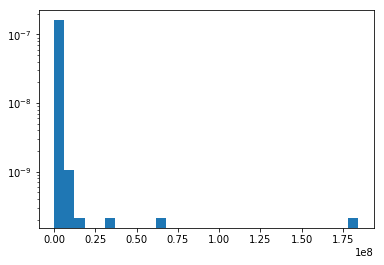

In [6]:
# histogram

fig, ax = plt.subplots()
ax.set_yscale('log')
plt.hist(data.values(), normed=True, bins=30)
plt.show()

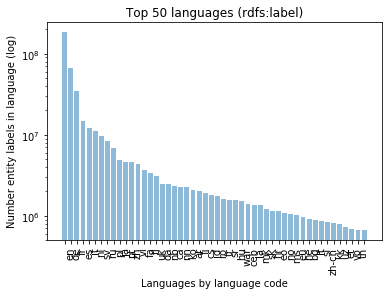

In [7]:
# barchart per language

data_keys_limited = sorted(data, key=data.get,reverse=True)[:50]
data_values_limited = []
for k in data_keys_limited:
    data_values_limited.append(data[k])

ypos = np.arange(len(data_keys_limited))
fig, ax = plt.subplots()

plt.title('Top 50 languages (rdfs:label)')
ax.bar(ypos, data_values_limited, align='center', alpha=0.5)

ax.set_xlabel('Languages by language code')
plt.xticks(ypos, data_keys_limited, rotation='vertical')

ax.set_ylabel('Number entity labels in language (log)')
ax.set_yscale('log')

plt.show()

In [8]:
def get_keys():
    data = {}
    with open('Q7-res.csv') as infile:
        reader = csv.reader(infile)
        next(reader) # skip header
        for r in reader:
            data[r[0].replace('"', '')] = int(r[1].replace('"', ''))
        return sorted(data, key=data.get, reverse=True)[:50]

In [9]:
domainfiles = {}
for filename in os.listdir('Results/PerDom'):
    if filename.strip().startswith('Q7-'):
        print filename
        domain = filename.split('-')[1]
        if domain in domainfiles:
            domainfiles[domain].append(filename)
        else:
            domainfiles[domain] = [filename]
domaindata = {}
for domain, filelist in domainfiles:
    for f in filelist:
        with open('Domains/' + f):
            data = get_language_data_Q7(f)
            for k in keys:
                if k in data:
                    if domain in domaindata:
                        domaindata[domain][k] += data[k]
                        domaindata[domain]['counter'] += 1
                    else:
                        domaindata[domain] = {}
                        domaindata[domain][k] = data[k]
                        domaindata[domain]['counter'] = 0

In [10]:
# TO BE CONTINUED WHEN WE HAVE THE DATA

# Graphs Q2

In [11]:
def get_data_Q2(filename):
    data = {}
    with open(filename) as infile:
        reader = csv.reader(infile)
        next(reader) # skip header
        for r in reader:
            data[r[0].replace('"', '')] = int(r[1].replace('"', ''))
    return data

In [12]:
data = get_data_Q2('Results/AllDoms/Q2_res.csv')

[8, 169720, 25, 25, 20, 3, 14236, 15919741, 23945, 331196, 6, 340, 12515, 274, 2892385, 332, 3, 2, 1, 23, 3715, 68842253, 3823, 69, 76, 518, 4352618, 11542902, 65, 4380, 103, 18, 187, 943, 250, 72, 31, 7, 162, 13158, 233, 107975, 2, 3265, 2766, 85, 283243, 23, 649432, 39, 327571, 10130250, 30, 3780, 303240563, 1549, 2, 2, 6684, 3818, 80996, 24057872, 57911283, 86, 3, 877, 8, 87, 18, 1, 593, 271, 957, 12, 4587, 3230, 5623730, 2649, 285, 30247]


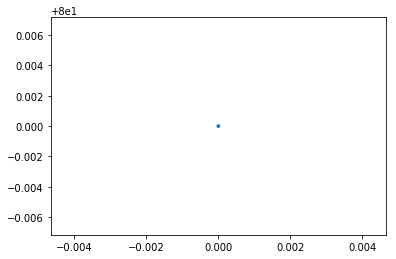

<Figure size 7200x7200 with 0 Axes>

In [13]:
length = len(data)

x = range(0,length, 10000)
y = range(length, length*2, 10000)
#values = [math.log(d) for d in data.values()]
area = data.values()
print data.values()

plt.scatter(x, y, s=area)
plt.figure(figsize=(100,100))
plt.show()

IndexError: list index out of range

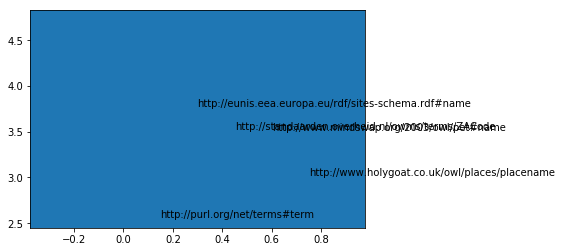

In [14]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
area = data.values()[:10]
n = ['a', 'b', 'b', 'd', 'e']

fig, ax = plt.subplots()
ax.scatter(z, y, s=area)

for i, txt in enumerate(data.keys()[:10]):
    ax.annotate(txt, (z[i], y[i]))

# Graphs Q3 and Q4

In [15]:
domainfiles = {}
for filename in os.listdir('Results/PerDom'):
    if filename.strip().startswith('Q3-'):
        domain = filename.split('-')[1]
        if domain in domainfiles:
            domainfiles[domain].append(filename)
        else:
            domainfiles[domain] = [filename]

In [16]:
# @todo: replace total.append(part) with comments when we have data for Q4
filepath = 'Results/PerDom/'
domaindata = {}
for domain, files in domainfiles.iteritems():
    domaindata[domain] = []
    completenesscounter = 0
    total = []
    for f in files:
        part = open(filepath+f).readlines()[1].strip()
        # whole = open(filepath+f.replace('Q3', 'Q4')).readlines()[1]
        if not part.isdigit(): #or not while.isdigit()
            #if part == 0 and whole == 0:
            continue
        #ratio = float(part)/float(whole)
        #total.append(ratio)
        part = float(part) # can be deleted later
        total.append(part)
    domaindata[domain] = total
print domaindata

{'cross_domain': [0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 32056.0, 31.0, 9.0, 0.0, 47844.0, 16988226.0, 156163.0, 56.0, 314.0, 1.0, 99.0, 1719.0, 2.0, 1487696.0, 1548770.0, 0.0, 0.0, 0.0, 0.0, 2693251.0, 3072653.0, 9605.0, 0.0, 111.0, 15.0, 0.0, 0.0, 2161699.0, 121848.0, 0.0, 0.0, 0.0, 80.0, 1.0, 0.0, 393889.0, 14162162.0, 518.0], 'government': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 117563.0, 0.0, 0.0, 0.0, 0.0, 294.0, 0.0, 0.0, 0.0, 0.0, 2620.0, 0.0, 0.0, 0.0, 190.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 373.0, 1151534.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31784.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'geography': [512.0, 117.0, 14350.0, 0.0, 0.0, 864.0, 9539429.0, 4.0, 0.0, 0.0, 9923812.0, 7501163.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4377.0, 0.0]}


In [17]:
plotdata = {}
for domain, values in domaindata.iteritems():
    plotdata[domain] = np.average(values)

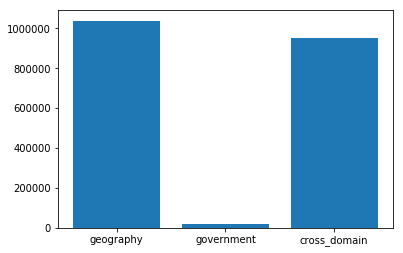

In [18]:
plt.bar(range(len(plotdata)), list(plotdata.values()), align='center')
plt.xticks(range(len(plotdata)), list(plotdata.keys()))
plt.show()

# Graphs Q8 and Q4

In [19]:
domainfiles = {}
for filename in os.listdir('Results/PerDom'):
    if filename.strip().startswith('Q8-'):
        domain = filename.split('-')[1]
        if domain in domainfiles:
            domainfiles[domain].append(filename)
        else:
            domainfiles[domain] = [filename]

In [20]:
# @todo: replace total.append(part) with comments when we have data for Q4
filepath = 'Results/PerDom/'
domaindata = {}
for domain, files in domainfiles.iteritems():
    domaindata[domain] = []
    completenesscounter = 0
    total = []
    for f in files:
        part = open(filepath+f).readlines()[1].strip()
        # whole = open(filepath+f.replace('Q3', 'Q4')).readlines()[1]
        if not part.isdigit(): #or not while.isdigit()
            #if part == 0 and whole == 0:
            continue
        #ratio = float(part)/float(whole)
        #total.append(ratio)
        part = float(part) # can be deleted later
        total.append(part)
    domaindata[domain] = total
print domaindata

{'cross_domain': [0.0, 393888.0, 4620853.0, 0.0, 161070.0, 5996.0, 258538.0]}


In [21]:
plotdata = {}
for domain, values in domaindata.iteritems():
    plotdata[domain] = np.average(values)

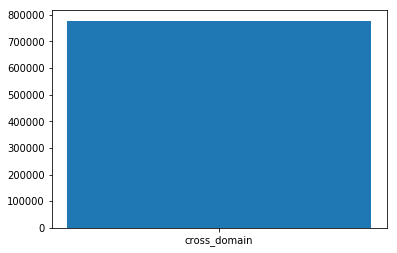

In [22]:
plt.bar(range(len(plotdata)), list(plotdata.values()), align='center')
plt.xticks(range(len(plotdata)), list(plotdata.keys()))
plt.show()

# Radar Chart all domains

Metrics: 
* Completeness (Q3/Q4)
* Completeness in English (Q5/Q4)
* Number of languages (Q6)
* Ambigious entities (Q8/Q4)
* Labeled Object (Q10/Q9)

In [23]:
# Completeness
part = int(open('Results/AllDoms/Q3_res.csv').readlines()[1].strip())
whole = int(open('Results/AllDoms/Q4_res.csv').readlines()[1].strip())
completeness = (float(part)/float(whole)) * 100

In [24]:
# Completeness in English
part = int(open('Results/AllDoms/Q5_res.csv').readlines()[1].strip())
whole = int(open('Results/AllDoms/Q4_res.csv').readlines()[1].strip())
completeness_en = (float(part)/float(whole)) * 100

In [25]:
# Number of languages
languages = int(open('Results/AllDoms/Q6_res.csv').readlines()[1].strip())

In [26]:
# Unambiguity
part = int(open('Results/AllDoms/Q8_res.csv').readlines()[1].strip())
whole = int(open('Results/AllDoms/Q4_res.csv').readlines()[1].strip())
ambiguity = (float(part)/float(whole)) * 100
unambiguity = 100 - ambiguity

In [33]:
# Labeled Object
# @todo
labeledobject = 100

In [56]:
data = {'Completeness': completeness, 'Completeness en': completeness_en, 'Unambiguity': unambiguity, 'Labeled object': labeledobject}
N = len(values)
keys = data.keys()
values = data.values()

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

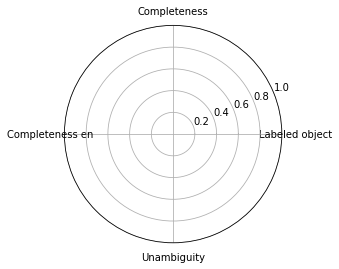

In [57]:
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles [:1]
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1],keys)
ax.plot(angles,values)
ax.fill(angles, values, 'teal', alpha=0.1)
ax.set_title("All domains")
plt.show()

[100, 10.180796592341236, 2.099343096538758, 99.09695722919848]


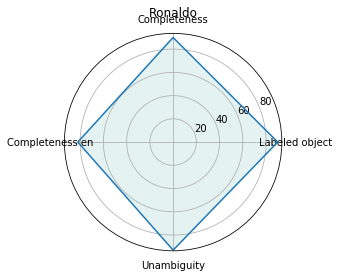

In [77]:
#Create a data frame from Messi and Ronaldo's 6 Ultimate Team data points from FIFA 18
Messi = {'Completeness': completeness, 'Completeness en': completeness_en, 'Unambiguity': unambiguity, 'Labeled object': labeledobject}
Ronaldo = {'Completeness': completeness, 'Completeness en': completeness_en, 'Unambiguity': unambiguity, 'Labeled object': labeledobject}
print Messi.values()
data = pd.DataFrame([Messi,Ronaldo], index = ["Messi","Ronaldo"])
data

datareal = {'Completeness': completeness, 'Completeness en': completeness_en, 'Unambiguity': unambiguity, 'Labeled object': labeledobject}

Attributes =datareal.keys()

AttNo = len(datareal)

#Create a data frame from Messi and Ronaldo's 6 Ultimate Team data points from FIFA 18
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90}

data = pd.DataFrame([Messi,Ronaldo], index = ["Messi","Ronaldo"])
data

values = data.iloc[1].tolist()
values += values [:1]

angles = [n / float(AttNo) * 2 * math.pi for n in range(AttNo)]
angles += angles [:1]

ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title("Ronaldo")
plt.show()
